In [1]:
import os
import json

import matplotlib.pyplot as plt
import cv2

import pandas as pd
import numpy as np

classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
            "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")

colors = ((255,255,255), (0,0,255), (0,0,122), (0,255,0), (0,122,0), 
            (255,0,0), (122,122,0), (122,0,0), (122,122,122), (0,122,122))

data_dir = '/opt/ml'
            

In [2]:

json_name = 'pseudo_final.json'

json = json.load(open(os.path.join(data_dir,'dataset', json_name)))
df_bbox = pd.DataFrame(json['annotations'])
groupby_bbox = df_bbox.groupby('image_id')
groupby_bbox = {idx: group for idx, group in groupby_bbox}

In [3]:
# valid_f0.json으로 inference 돌려야함
csv_name = 'final_submission_4.csv'

output = pd.read_csv(os.path.join(data_dir,csv_name))
output

,PredictionString,image_id
0,7 0.8724725246429443 603.0435791015625 519.628...,test/0000.jpg
1,5 0.7784004211425781 132.03753662109375 0.4261...,test/0001.jpg
2,1 0.7561861872673035 76.95603942871094 272.552...,test/0002.jpg
3,9 0.8253653049468994 145.83485412597656 260.78...,test/0003.jpg
4,1 0.6751655340194702 194.5076904296875 252.562...,test/0004.jpg
...,...,...
4866,1 0.6198861002922058 292.9410400390625 348.139...,test/4866.jpg
4867,3 0.8056855797767639 414.900634765625 319.4334...,test/4867.jpg
4868,7 0.7691226005554199 116.36771392822266 453.59...,test/4868.jpg
4869,0 0.7409563660621643 1.453220248222351 236.287...,test/4869.jpg


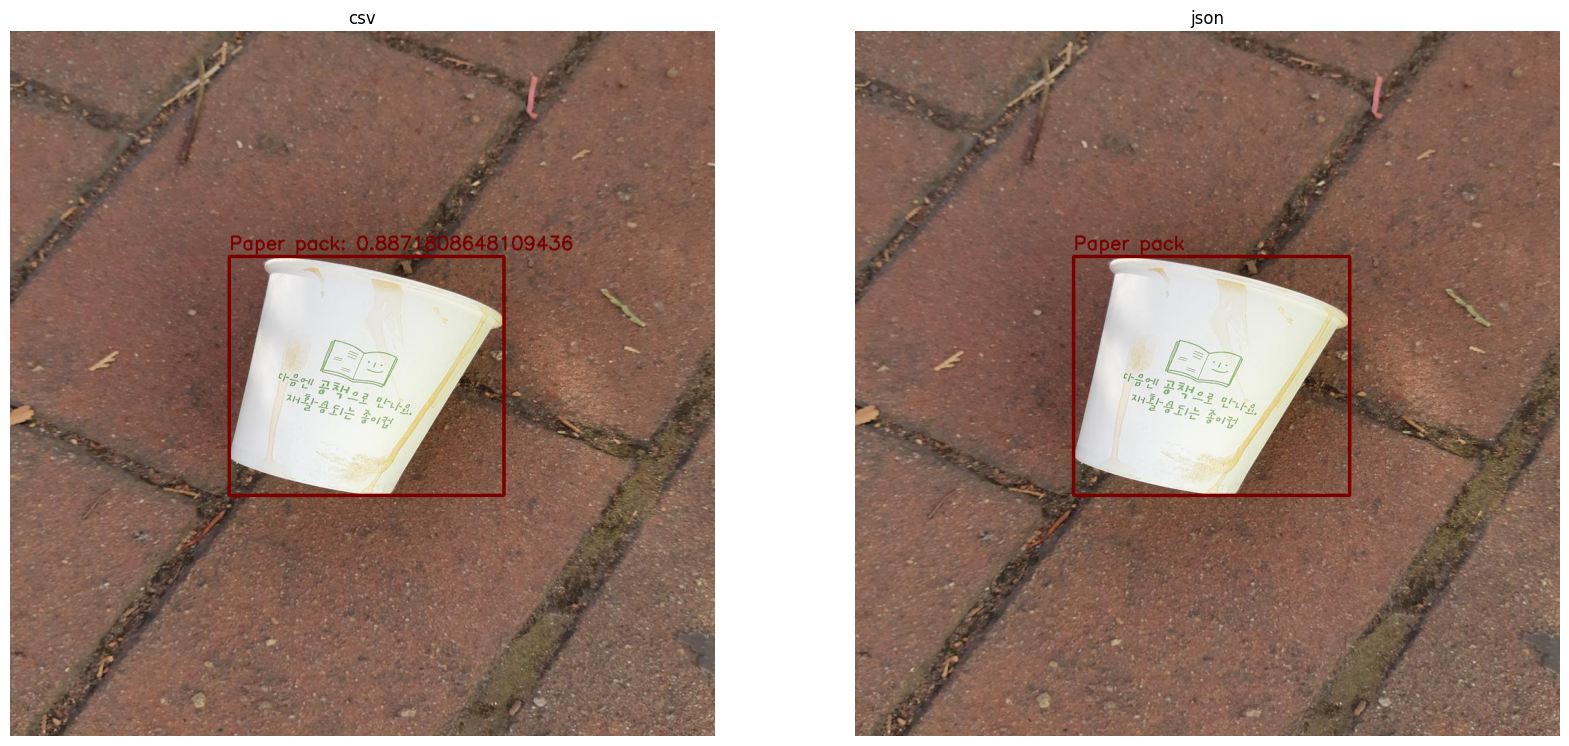

In [4]:
idx = 3292
threshold = 0.35

o = output['PredictionString'][idx].split(' ')
image = cv2.imread(os.path.join(data_dir,'dataset',output['image_id'][idx]))

fig, axes = plt.subplots(1,2, figsize=(20,10))


for i in range(len(o)//6):
    id, score, xmin, ymin, xmax, ymax = map(float,o[6*i: 6*(i+1)])
    id, xmin, ymin, xmax, ymax = map(int, [id, xmin, ymin, xmax, ymax])

    if score < threshold:
        continue

    image = cv2.rectangle(image, (xmin,ymin), (xmax,ymax), colors[id], 3)
    cv2.putText(image, f'{classes[id]}: {score}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[id], 2)
    
axes[0].set_title('csv')
axes[0].plot()
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].axis('off')


image = cv2.imread(os.path.join(data_dir,'dataset',output['image_id'][idx]))

for cat_id, bbox in zip(groupby_bbox[idx].category_id, groupby_bbox[idx].bbox):
    x, y, w, h = map(int, bbox)
    image = cv2.rectangle(image, (x, y), (x+w, y+h), colors[cat_id], 3)
    cv2.putText(image, classes[cat_id], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[cat_id], 2)
    
axes[1].set_title('json')
axes[1].plot()
axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].axis('off')

plt.show()